# Sfida: Analizzare un Testo su Data Science

> *In questo notebook, sperimentiamo l'uso di un URL diverso - articolo di Wikipedia su Machine Learning. Si può notare che, a differenza di Data Science, questo articolo contiene molti termini, rendendo l'analisi più problematica. Dobbiamo trovare un altro modo per ripulire i dati dopo l'estrazione delle parole chiave, per eliminare alcune combinazioni di parole frequenti ma poco significative.*

In questo esempio, facciamo un semplice esercizio che copre tutti i passaggi di un tradizionale processo di data science. Non è necessario scrivere alcun codice, puoi semplicemente cliccare sulle celle qui sotto per eseguirle e osservare il risultato. Come sfida, ti invitiamo a provare questo codice con dati diversi.

## Obiettivo

In questa lezione, abbiamo discusso diversi concetti relativi alla Data Science. Proviamo a scoprire altri concetti correlati facendo un po' di **text mining**. Inizieremo con un testo sulla Data Science, estrarremo parole chiave da esso e poi cercheremo di visualizzare il risultato.

Come testo, utilizzerò la pagina su Data Science da Wikipedia:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Passaggio 1: Ottenere i dati

Il primo passo in ogni processo di data science è ottenere i dati. Utilizzeremo la libreria `requests` per farlo:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Passaggio 2: Trasformare i dati

Il passo successivo è convertire i dati in una forma adatta all'elaborazione. Nel nostro caso, abbiamo scaricato il codice sorgente HTML dalla pagina e dobbiamo convertirlo in testo semplice.

Ci sono molti modi per farlo. Utilizzeremo l'oggetto [HTMLParser](https://docs.python.org/3/library/html.parser.html) integrato più semplice di Python. Dobbiamo creare una sottoclasse della classe `HTMLParser` e definire il codice che raccoglierà tutto il testo all'interno dei tag HTML, ad eccezione dei tag `<script>` e `<style>`.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Passaggio 3: Ottenere approfondimenti

Il passo più importante è trasformare i nostri dati in una forma da cui possiamo trarre approfondimenti. Nel nostro caso, vogliamo estrarre parole chiave dal testo e vedere quali parole chiave sono più significative.

Utilizzeremo una libreria Python chiamata [RAKE](https://github.com/aneesha/RAKE) per l'estrazione delle parole chiave. Per prima cosa, installiamo questa libreria nel caso in cui non sia già presente:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


La funzionalità principale è disponibile dall'oggetto `Rake`, che possiamo personalizzare utilizzando alcuni parametri. Nel nostro caso, imposteremo la lunghezza minima di una parola chiave a 5 caratteri, la frequenza minima di una parola chiave nel documento a 3 e il numero massimo di parole in una parola chiave a 2. Sentiti libero di sperimentare con altri valori e osservare il risultato.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Abbiamo ottenuto un elenco di termini insieme al relativo grado di importanza. Come puoi vedere, le discipline più rilevanti, come machine learning e big data, sono presenti nelle prime posizioni della lista.

## Passaggio 4: Visualizzare il Risultato

Le persone interpretano meglio i dati in forma visiva. Pertanto, spesso ha senso visualizzare i dati per trarre alcune intuizioni. Possiamo utilizzare la libreria `matplotlib` in Python per tracciare una semplice distribuzione delle parole chiave con la loro rilevanza:


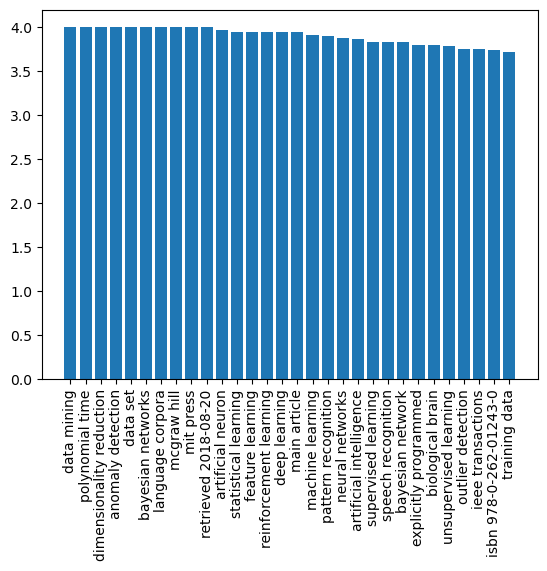

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

C'è, tuttavia, un modo ancora migliore per visualizzare le frequenze delle parole - usando **Word Cloud**. Avremo bisogno di installare un'altra libreria per tracciare la word cloud dalla nostra lista di parole chiave.


In [71]:
!{sys.executable} -m pip install wordcloud

L'oggetto `WordCloud` è responsabile di accettare sia il testo originale, sia un elenco pre-calcolato di parole con le loro frequenze, e restituisce un'immagine, che può poi essere visualizzata utilizzando `matplotlib`:


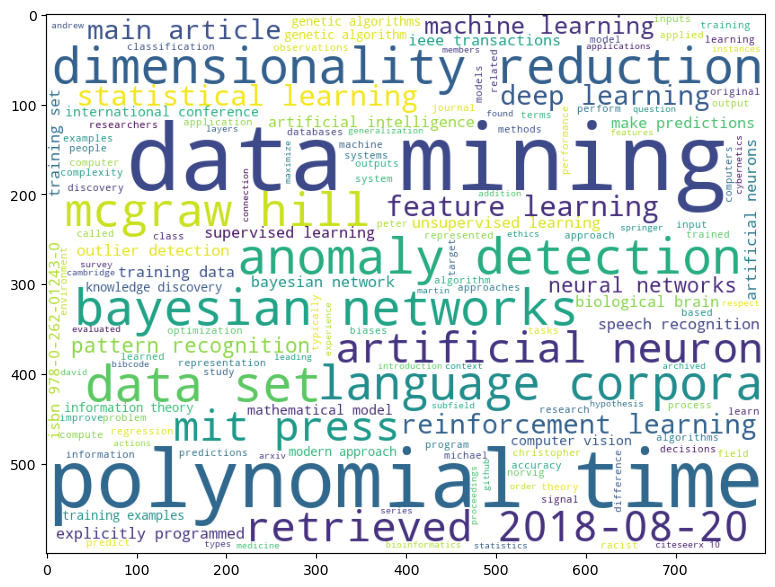

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Possiamo anche passare il testo originale a `WordCloud` - vediamo se riusciamo a ottenere un risultato simile:


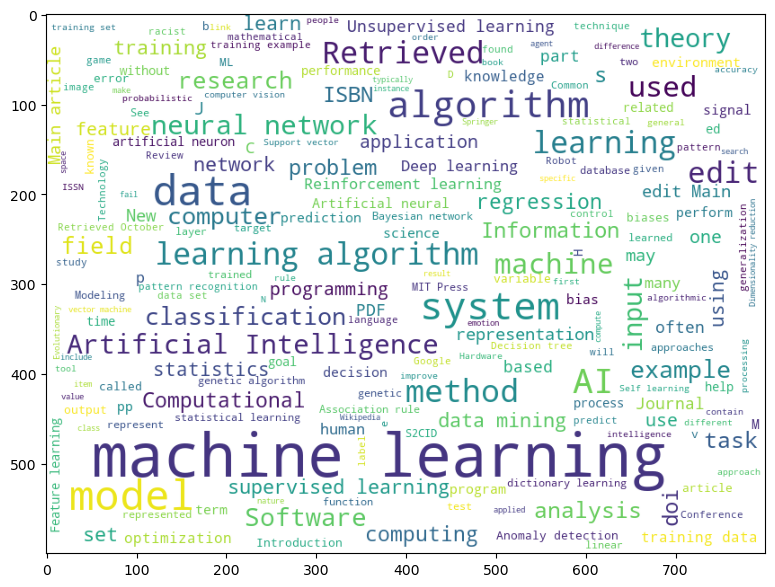

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Puoi vedere che la word cloud ora appare più impressionante, ma contiene anche molto rumore (ad esempio, parole non correlate come `Retrieved on`). Inoltre, otteniamo meno parole chiave composte da due termini, come *data scientist* o *computer science*. Questo perché l'algoritmo RAKE fa un lavoro molto migliore nel selezionare buone parole chiave dal testo. Questo esempio illustra l'importanza della pre-elaborazione e pulizia dei dati, poiché avere un quadro chiaro alla fine ci permetterà di prendere decisioni migliori.

In questo esercizio abbiamo seguito un processo semplice per estrarre un significato da un testo di Wikipedia, sotto forma di parole chiave e word cloud. Questo esempio è piuttosto semplice, ma dimostra bene tutti i passaggi tipici che un data scientist affronta quando lavora con i dati, a partire dall'acquisizione dei dati fino alla visualizzazione.

Nel nostro corso discuteremo tutti questi passaggi in dettaglio.



---

**Disclaimer**:  
Questo documento è stato tradotto utilizzando il servizio di traduzione automatica [Co-op Translator](https://github.com/Azure/co-op-translator). Sebbene ci impegniamo per garantire l'accuratezza, si prega di notare che le traduzioni automatiche possono contenere errori o imprecisioni. Il documento originale nella sua lingua nativa dovrebbe essere considerato la fonte autorevole. Per informazioni critiche, si raccomanda una traduzione professionale effettuata da un traduttore umano. Non siamo responsabili per eventuali incomprensioni o interpretazioni errate derivanti dall'uso di questa traduzione.
